In [248]:
import pandas as pd

df= pd.read_csv("C:/Users/anace/OneDrive/Escritorio/data_sets/tortilla_prices.csv")


In [249]:
df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [250]:
df.tail()

,State,City,Year,Month,Day,Store type,Price per kilogram
289141,Veracruz,Coatzacoalcos,2024,10,21,Big Retail Store,12.57
289142,Veracruz,Veracruz,2024,10,21,Big Retail Store,13.27
289143,Veracruz,Xalapa,2024,10,21,Big Retail Store,13.73
289144,Yucatán,Mérida,2024,10,21,Big Retail Store,13.13
289145,Zacatecas,Zacatecas,2024,10,21,Big Retail Store,13.28


In [251]:
df.info()

#Price per kilogram  282756 non-null,= 6390 missing  289146



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289146 entries, 0 to 289145
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               289146 non-null  object 
 1   City                289146 non-null  object 
 2   Year                289146 non-null  int64  
 3   Month               289146 non-null  int64  
 4   Day                 289146 non-null  int64  
 5   Store type          289146 non-null  object 
 6   Price per kilogram  282756 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 15.4+ MB


In [252]:
missing_values= df.isnull().sum()



In [253]:
df.isnull()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
289141,False,False,False,False,False,False,False
289142,False,False,False,False,False,False,False
289143,False,False,False,False,False,False,False
289144,False,False,False,False,False,False,False


In [254]:
mean_bygroup = df.groupby(["State", "City", "Year", "Month", "Day"])["Price per kilogram"].mean().reset_index()
mean_bygroup

#this was made to see if the means are similar to interpolate

,State,City,Year,Month,Day,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,7.865
1,Aguascalientes,Aguascalientes,2007,1,12,7.865
2,Aguascalientes,Aguascalientes,2007,1,15,7.865
3,Aguascalientes,Aguascalientes,2007,1,16,7.865
4,Aguascalientes,Aguascalientes,2007,1,17,7.865
...,...,...,...,...,...,...
145254,Zacatecas,Zacatecas,2024,10,11,17.640
145255,Zacatecas,Zacatecas,2024,10,14,17.640
145256,Zacatecas,Zacatecas,2024,10,16,17.640
145257,Zacatecas,Zacatecas,2024,10,18,17.640


In [255]:

df = df.merge(mean_bygroup, on=["State", "City", "Year", "Month", "Day"], how="left", suffixes=("", "_mean"))

#I fill with a mean value at least 1526 values 



In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289146 entries, 0 to 289145
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   State                    289146 non-null  object 
 1   City                     289146 non-null  object 
 2   Year                     289146 non-null  int64  
 3   Month                    289146 non-null  int64  
 4   Day                      289146 non-null  int64  
 5   Store type               289146 non-null  object 
 6   Price per kilogram       282756 non-null  float64
 7   Price per kilogram_mean  282845 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.6+ MB


In [257]:
df=df.drop(columns= ["Price per kilogram_mean"])


In [258]:
duplicates= df.duplicated().sum()
duplicates

#we dont have duplicates

0

now I need to think if I delete this values that are missing

In [259]:
df["City"].value_counts()

City
Aguascalientes           5368
Tepic                    5368
Mexicali                 5368
Oaxaca                   5368
Puebla                   5368
Querétaro                5368
Cancún                   5368
Chetumal                 5368
San Luis Potosí          5368
Culiacán                 5368
Cd. Obregón              5368
Hermosillo               5368
Nogales                  5368
Villahermosa             5368
Cd. Victoria             5368
Matamoros                5368
Nuevo Laredo             5368
Reynosa                  5368
Tampico                  5368
Tlaxcala                 5368
Coatzacoalcos            5368
Veracruz                 5368
Xalapa                   5368
Mérida                   5368
Zacatecas                5368
Monterrey                5368
ZM Monterrey             5368
Cuernavaca               5368
ZM D.F.                  5368
Tijuana                  5368
La Paz                   5368
Campeche                 5368
Piedras Negras           5368
Salti

#this has different numbers. we need to see if the Nan belong to them. 
ZM Puebla                4911
Gómez Palacio            4612
Torreón                  3856
Celaya                   3856
Irapuato                 3777
Poza Rica                3038
San Luis Río Colorado    2064

#vi la cantidad de valores que hay por cada ciudad, casi todos tienen 5368. pero estos no  ZM Puebla                4911
Gómez Palacio            4612
Torreón                  3856
Celaya                   3856
Irapuato                 3777
Poza Rica                3038
San Luis Río Colorado    2064

celaya tiene #126 rows Null e  irapuato 166. los demas no tienen. entonces deberia de eleimar los datos nulos en general? o que cado con mis missing values. no, no quiero interpolar

In [260]:

df_filter = df[(df["City"] == "Torreon") & (df["Price per kilogram"].isna())]


df_filter

#no null values 

,State,City,Year,Month,Day,Store type,Price per kilogram


In [261]:
df_filter= df[(df["City"]== "Gómez Palacio") & (df["Price per kilogram"].isna())]

df_filter

,State,City,Year,Month,Day,Store type,Price per kilogram


In [262]:
df_filter= df[(df["City"]== "Celaya") & (df["Price per kilogram"].isna())]

df_filter


#126 rows Null 

,State,City,Year,Month,Day,Store type,Price per kilogram
81861,Guanajuato,Celaya,2012,5,15,Mom and Pop Store,NaN
82533,Guanajuato,Celaya,2012,6,9,Mom and Pop Store,NaN
86397,Guanajuato,Celaya,2012,11,19,Mom and Pop Store,NaN
90541,Guanajuato,Celaya,2012,5,15,Big Retail Store,NaN
91213,Guanajuato,Celaya,2012,6,9,Big Retail Store,NaN
...,...,...,...,...,...,...,...
237162,Guanajuato,Celaya,2021,2,17,Big Retail Store,NaN
237215,Guanajuato,Celaya,2021,2,19,Big Retail Store,NaN
237268,Guanajuato,Celaya,2021,2,22,Big Retail Store,NaN
237321,Guanajuato,Celaya,2021,2,24,Big Retail Store,NaN


In [263]:
df_filter= df[(df["City"]== "Irapuato") & (df["Price per kilogram"].isna())]

df_filter


#166 nulls

,State,City,Year,Month,Day,Store type,Price per kilogram
16,Guanajuato,Irapuato,2007,1,10,Mom and Pop Store,NaN
69,Guanajuato,Irapuato,2007,1,12,Mom and Pop Store,NaN
122,Guanajuato,Irapuato,2007,1,15,Mom and Pop Store,NaN
175,Guanajuato,Irapuato,2007,1,16,Mom and Pop Store,NaN
228,Guanajuato,Irapuato,2007,1,17,Mom and Pop Store,NaN
...,...,...,...,...,...,...,...
212460,Guanajuato,Irapuato,2019,12,18,Big Retail Store,NaN
212514,Guanajuato,Irapuato,2019,12,20,Big Retail Store,NaN
212568,Guanajuato,Irapuato,2019,12,23,Big Retail Store,NaN
212622,Guanajuato,Irapuato,2019,12,27,Big Retail Store,NaN


the null values varies in dates so I decided to delete the null values :)

In [264]:
df.dropna(subset=["Price per kilogram"], inplace=True)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282756 entries, 0 to 289145
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               282756 non-null  object 
 1   City                282756 non-null  object 
 2   Year                282756 non-null  int64  
 3   Month               282756 non-null  int64  
 4   Day                 282756 non-null  int64  
 5   Store type          282756 non-null  object 
 6   Price per kilogram  282756 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.3+ MB


In [266]:
df["State"].unique()


array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Coahuila', 'Colima',
       'Chiapas', 'Chihuahua', 'D.F.', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Edo.\xa0México', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [267]:
df["State"]= df["State"].replace("D.F.", "CDMX")

In [268]:
df["State"].unique()

array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Coahuila', 'Colima',
       'Chiapas', 'Chihuahua', 'CDMX', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Edo.\xa0México', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [269]:
distinct_states = df["State"].nunique()
distinct_states

32

In [270]:
df["City"].unique()

array(['Aguascalientes', 'Tijuana', 'La\xa0Paz', 'Campeche',
       'Piedras\xa0Negras', 'Colima', 'Tuxtla\xa0Gutiérrez', 'Chihuahua',
       'D.F.', 'ZM\xa0D.F.', 'Durango', 'León', 'Acapulco', 'Pachuca',
       'Guadalajara', 'Toluca', 'Morelia', 'Cuernavaca', 'Tepic',
       'Monterrey', 'Oaxaca', 'Puebla', 'Querétaro', 'Cancún', 'Chetumal',
       'San\xa0Luis\xa0Potosí', 'Culiacán', 'Cd.\xa0Obregón',
       'Hermosillo', 'Villahermosa', 'Cd.\xa0Victoria', 'Tlaxcala',
       'Coatzacoalcos', 'Poza\xa0Rica', 'Veracruz', 'Xalapa', 'Mérida',
       'Zacatecas', 'Matamoros', 'Nuevo\xa0Laredo', 'Reynosa', 'Mexicali',
       'Saltillo', 'Tapachula', 'Cd.\xa0Juárez', 'Gómez\xa0Palacio',
       'Irapuato', 'Chilpancingo', 'ZM\xa0Guadalajara', 'ZM\xa0Monterrey',
       'ZM\xa0Puebla', 'Nogales', 'Tampico', 'Torreón', 'Celaya',
       'San\xa0Luis\xa0Río\xa0Colorado'], dtype=object)

In [271]:
total_cities= df.groupby("State")["City"].nunique()
total_cities

#tamaulipas hs more cities, Veracruz and Sonora 

State
Aguascalientes         1
Baja California        2
Baja California Sur    1
CDMX                   2
Campeche               1
Chiapas                2
Chihuahua              2
Coahuila               3
Colima                 1
Durango                2
Edo. México            1
Guanajuato             3
Guerrero               2
Hidalgo                1
Jalisco                2
Michoacán              1
Morelos                1
Nayarit                1
Nuevo León             2
Oaxaca                 1
Puebla                 2
Querétaro              1
Quintana Roo           2
San Luis Potosí        1
Sinaloa                1
Sonora                 4
Tabasco                1
Tamaulipas             5
Tlaxcala               1
Veracruz               4
Yucatán                1
Zacatecas              1
Name: City, dtype: int64

In [272]:
df["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [273]:
df["Month"] = df["Month"].replace({
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July", 
    8: "August", 
    9: "September", 
    10: "October", 
    11: "November", 
    12: "December"
})



In [274]:
df["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [275]:
df["Store type"].unique()

array(['Mom and Pop Store', 'Big Retail Store'], dtype=object)

In [276]:
df["Store type"].unique()

array(['Mom and Pop Store', 'Big Retail Store'], dtype=object)

In [277]:
df["Store type"] = df["Store type"].replace('Mom and Pop Store',"Small Independent Store")



In [278]:
df["Store type"].unique()

array(['Small Independent Store', 'Big Retail Store'], dtype=object)

bar char for the change of prioce between time 

maybe the biggest price by n 5 nd the lowest (mena?)

maybe another for the types of store (pie chart about this )

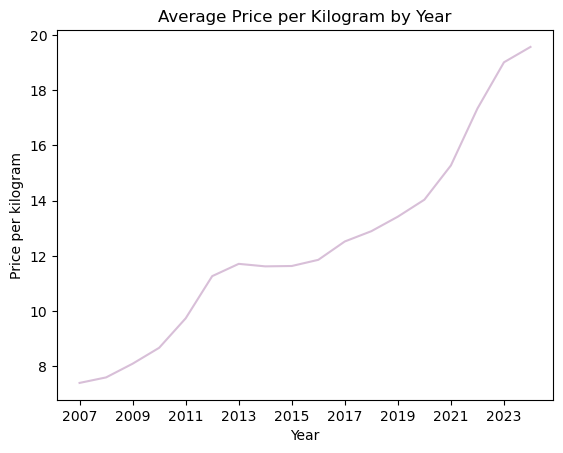

In [279]:
import matplotlib.pyplot as plt

mean_year = df.groupby("Year")["Price per kilogram"].mean()

colors="#D8BFD8"
plt.plot(mean_year.index, mean_year.values,color=colors)
plt.xlabel('Year')
plt.ylabel('Price per kilogram')
plt.title('Average Price per Kilogram by Year')


plt.xticks(mean_year.index[::2])  #stablish the values as int and with and interval 

plt.show()

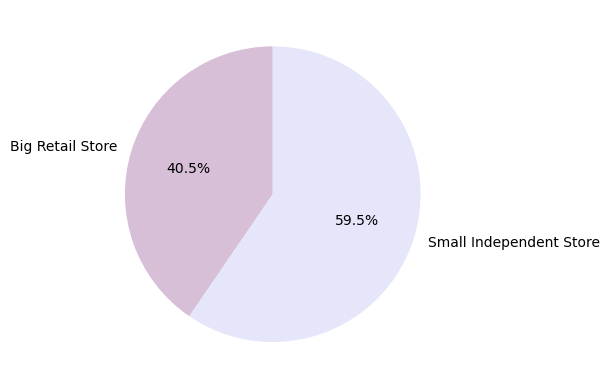

In [280]:
import matplotlib.pyplot as plt

mean_store= df.groupby("Store type")["Price per kilogram"].mean()

colors=["#D8BFD8", "#E6E6FA"] 

plt.pie(mean_store.values, labels=mean_store.index,colors=colors, autopct="%1.1f%%", startangle=90) #write this

plt.show()

#this was a trial


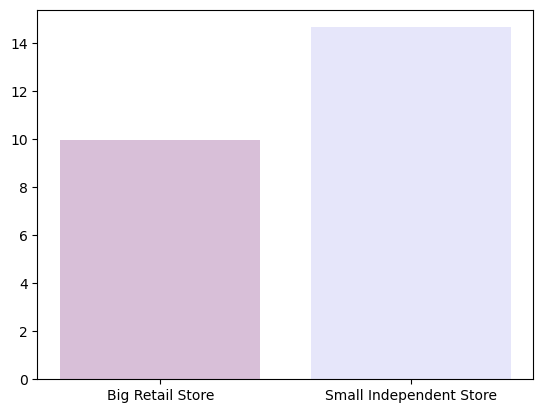

In [281]:
import matplotlib.pyplot as plt

colors= ["#D8BFD8", "#E6E6FA"] 
mean_store= df.groupby("Store type")["Price per kilogram"].mean()

plt.bar(mean_store.index, mean_store.values,color=colors)

plt.show()

In [282]:
df.to_csv("tortilla_prices_updated.csv", index=False, encoding="utf-8")


In [283]:
df["State"].unique()

array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Coahuila', 'Colima',
       'Chiapas', 'Chihuahua', 'CDMX', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Edo.\xa0México', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [284]:
df["City"].unique()

#'Puebla', 'ZM\xa0Puebla', ZM\xa0Monterrey, ZM\xa0Guadalajara,ZM\xa0D.F., 'CDMX',

array(['Aguascalientes', 'Tijuana', 'La\xa0Paz', 'Campeche',
       'Piedras\xa0Negras', 'Colima', 'Tuxtla\xa0Gutiérrez', 'Chihuahua',
       'D.F.', 'ZM\xa0D.F.', 'Durango', 'León', 'Acapulco', 'Pachuca',
       'Guadalajara', 'Toluca', 'Morelia', 'Cuernavaca', 'Tepic',
       'Monterrey', 'Oaxaca', 'Puebla', 'Querétaro', 'Cancún', 'Chetumal',
       'San\xa0Luis\xa0Potosí', 'Culiacán', 'Cd.\xa0Obregón',
       'Hermosillo', 'Villahermosa', 'Cd.\xa0Victoria', 'Tlaxcala',
       'Coatzacoalcos', 'Poza\xa0Rica', 'Veracruz', 'Xalapa', 'Mérida',
       'Zacatecas', 'Matamoros', 'Nuevo\xa0Laredo', 'Reynosa', 'Mexicali',
       'Saltillo', 'Tapachula', 'Cd.\xa0Juárez', 'Gómez\xa0Palacio',
       'Irapuato', 'Chilpancingo', 'ZM\xa0Guadalajara', 'ZM\xa0Monterrey',
       'ZM\xa0Puebla', 'Nogales', 'Tampico', 'Torreón', 'Celaya',
       'San\xa0Luis\xa0Río\xa0Colorado'], dtype=object)

In [285]:
df["City"]= df["City"].replace({"ZM\xa0D.F.": "CDMX", "ZM\xa0Puebla": "Puebla", "ZM\xa0Monterrey": "Monterrey", "ZM\xa0Guadalajara": "Guadalajara"})

In [286]:
df["City"].unique()

array(['Aguascalientes', 'Tijuana', 'La\xa0Paz', 'Campeche',
       'Piedras\xa0Negras', 'Colima', 'Tuxtla\xa0Gutiérrez', 'Chihuahua',
       'D.F.', 'CDMX', 'Durango', 'León', 'Acapulco', 'Pachuca',
       'Guadalajara', 'Toluca', 'Morelia', 'Cuernavaca', 'Tepic',
       'Monterrey', 'Oaxaca', 'Puebla', 'Querétaro', 'Cancún', 'Chetumal',
       'San\xa0Luis\xa0Potosí', 'Culiacán', 'Cd.\xa0Obregón',
       'Hermosillo', 'Villahermosa', 'Cd.\xa0Victoria', 'Tlaxcala',
       'Coatzacoalcos', 'Poza\xa0Rica', 'Veracruz', 'Xalapa', 'Mérida',
       'Zacatecas', 'Matamoros', 'Nuevo\xa0Laredo', 'Reynosa', 'Mexicali',
       'Saltillo', 'Tapachula', 'Cd.\xa0Juárez', 'Gómez\xa0Palacio',
       'Irapuato', 'Chilpancingo', 'Nogales', 'Tampico', 'Torreón',
       'Celaya', 'San\xa0Luis\xa0Río\xa0Colorado'], dtype=object)

In [287]:
pivot_table = df.pivot_table(values='Price per kilogram', index='Year', aggfunc='mean')
pivot_table

,Price per kilogram
Year,
2007,7.399119
2008,7.598889
2009,8.094949
2010,8.670437
2011,9.737406
2012,11.265235
2013,11.710039
2014,11.619433
2015,11.632321
